## Importing require Libraries : 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

## Scraping the required data:

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

In [3]:
reviews = []

for i in range(1, pages + 1):
    print(f"Scraping page{i}")
    
    # create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    
    # Collect HTML data from this page
    response = requests.get(url)
    
    # parse the content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    
    for para in parsed_content.find_all("div",{"class":"text_content"}):
        reviews.append(para.get_text())
        
    print(f"    ---> {len(reviews)} total reviews")    

Scraping page1
    ---> 100 total reviews
Scraping page2
    ---> 200 total reviews
Scraping page3
    ---> 300 total reviews
Scraping page4
    ---> 400 total reviews
Scraping page5
    ---> 500 total reviews
Scraping page6
    ---> 600 total reviews
Scraping page7
    ---> 700 total reviews
Scraping page8
    ---> 800 total reviews
Scraping page9
    ---> 900 total reviews
Scraping page10
    ---> 1000 total reviews


## Creating DataFrame:

In [4]:
data = pd.DataFrame()
data["reviews"] = reviews
data.head()

,reviews
0,"✅ Trip Verified | The seats were excellent, ..."
1,✅ Trip Verified | After the nightmare of get...
2,✅ Trip Verified | Prior to boarding a gate a...
3,✅ Trip Verified | I flew from Amsterdam to L...
4,"✅ Trip Verified | First the good news, the clu..."


## Converting it to CSV file:

In [5]:
data.to_csv("BA_reviews.csv")

In [6]:
print(data)

                                               reviews
0    ✅ Trip Verified |   The seats were excellent, ...
1    ✅ Trip Verified |   After the nightmare of get...
2    ✅ Trip Verified |   Prior to boarding a gate a...
3    ✅ Trip Verified |   I flew from Amsterdam to L...
4    ✅ Trip Verified | First the good news, the clu...
..                                                 ...
995  ✅ Trip Verified |  Sydney to London via Singap...
996  Not Verified |  London to Johannesburg. Britis...
997  ✅ Trip Verified | I have to say travelling in ...
998  Not Verified |  I had a stress free journey wi...
999  ✅ Trip Verified |  Edinburgh to Kuala Lumpur v...

[1000 rows x 1 columns]


## Removing unwanted text part and symbols from reviews column:

In [7]:
def remove_tic(column):
    return column.str.replace('✅ Trip Verified |','')

In [8]:
data['reviews'] = remove_tic(data['reviews'])

<ipython-input-7-2467e2f79fbd>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  return column.str.replace('✅ Trip Verified |','')


In [9]:
def remove_nt(column):
    return column.str.replace('Not Verified |','')

In [10]:
data['reviews'] = remove_nt(data['reviews'])

<ipython-input-9-7e6cf5d772bc>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  return column.str.replace('Not Verified |','')


In [11]:
data

,reviews
0,"| The seats were excellent, with a feel of m..."
1,| After the nightmare of getting through tri...
2,| Prior to boarding a gate agent seemed to p...
3,| I flew from Amsterdam to Las Vegas with a ...
4,"| First the good news, the club suites are suc..."
...,...
995,| Sydney to London via Singapore with British...
996,| London to Johannesburg. British Airways is ...
997,| I have to say travelling in Club Europe is a...
998,| I had a stress free journey with my 8 yr ol...


# Classifying the reviews in positive and negative reviews :

### Applying Sentiment Analysis using TextBlob:

In [12]:
from textblob import TextBlob

In [13]:
data['sentiment_score'] = data['reviews'].apply(lambda review: TextBlob(str(review)).sentiment.polarity)

### Classifying the reviews based on polarity Score:

In [14]:
data['sentiment_label'] = data['sentiment_score'].apply(lambda score: "Positve" if score > 0 else ("Negative" if score <0 else "Neutral"))

In [15]:
data

,reviews,sentiment_score,sentiment_label
0,"| The seats were excellent, with a feel of m...",0.357407,Positve
1,| After the nightmare of getting through tri...,0.051178,Positve
2,| Prior to boarding a gate agent seemed to p...,-0.076786,Negative
3,| I flew from Amsterdam to Las Vegas with a ...,0.037584,Positve
4,"| First the good news, the club suites are suc...",0.139035,Positve
...,...,...,...
995,| Sydney to London via Singapore with British...,0.091667,Positve
996,| London to Johannesburg. British Airways is ...,0.110300,Positve
997,| I have to say travelling in Club Europe is a...,-0.053472,Negative
998,| I had a stress free journey with my 8 yr ol...,0.176058,Positve


In [16]:
d = data["sentiment_label"].value_counts()

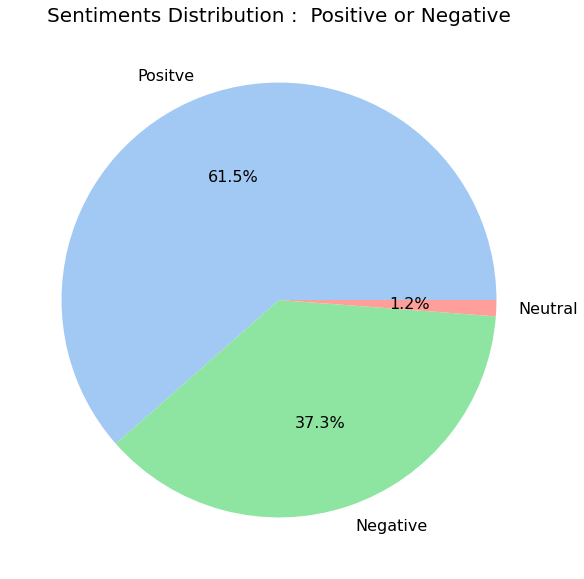

In [17]:
plt.figure(figsize =(10,10))
plt.pie(x = d, labels = d.keys(),autopct = "%1.1f%%",colors = sns.color_palette("pastel6"),textprops = {'fontsize': 16})
plt.title("Sentiments Distribution :  Positive or Negative", fontsize = 20)
plt.show()

# Conclusion : From the above dataset we can say that 61.5% reviews from customer are Positive, 37.3% are negative reviews and 1.2% are the Neutral reviews.